# Phase 1 Project: Movie Analysis for Microsoft Movie Studios

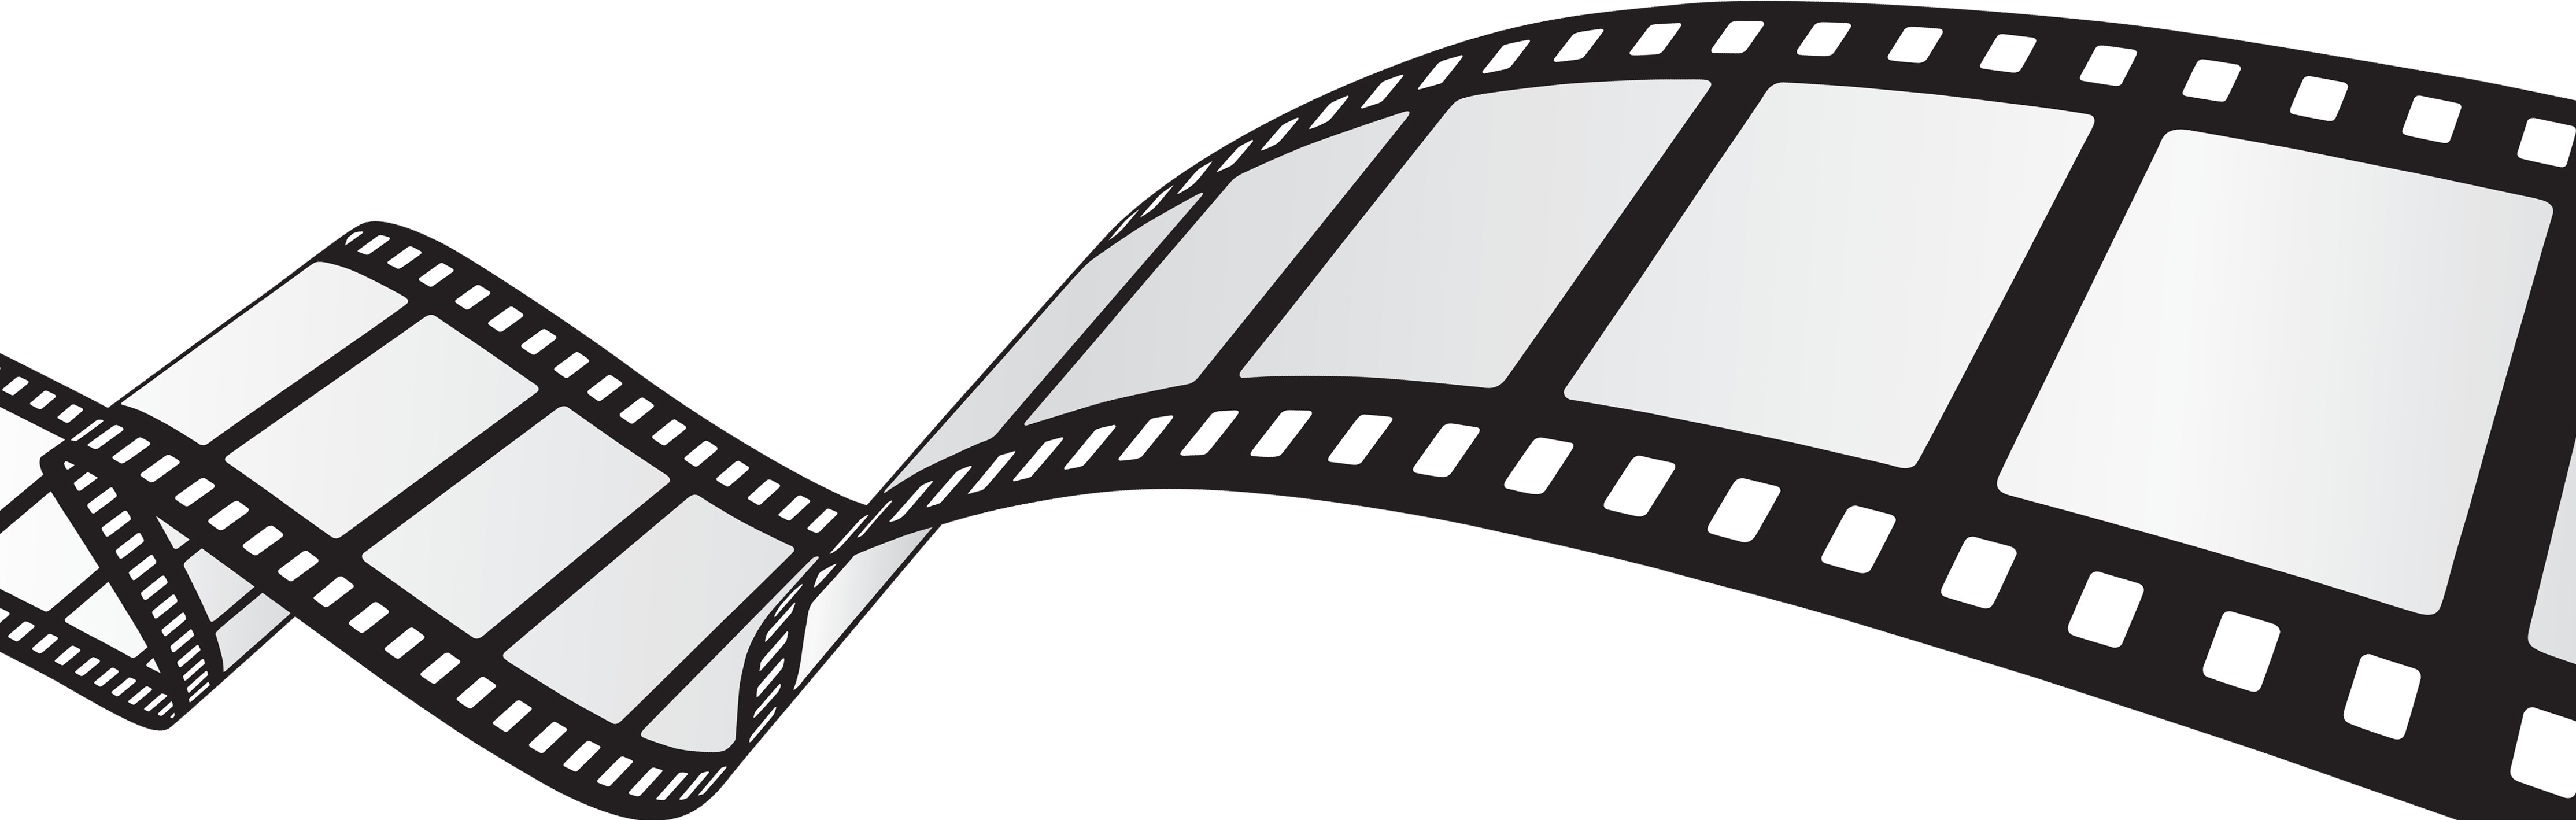

**Author**: Jordana Tepper

**Pace**: Live NYC

**Instructor**: Joseph Mata

## Overview

This project analyzes existing movie data in order to help Microsoft with the launch of its new production studio. Such data consists of movie ratings, cast and crew, gross earnings, and movie runtime. After utilizing the process of exploratory data analysis, I provide four recommendations for Microsoft Movie Studios, including the most successful genres, the ideal length of a movie, and target directors and actors.

## Business Problem

Microsoft has decided to open a new branch of their company: Microsoft Movie Studios. However, they need help in assessing the different attributes of movies that bring in the most success. Therefore, I have been tasked with aiding the new head of Microsoft Movie Studios in making decisions regarding what type of films to create through the use of exploratory data analysis.

## Data Understanding

The data that I use for my analysis comes from two datasets: IMDb and Box Office Mojo. These sources include information about ratings and lengths of various films, genres, directors, actors and actresses, and total gross earnings (foreign and domestic); such data primarily comes from the years 2010 - 2018.

In [1]:
#Importing neccesary packages
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
#Loading in data from imdb file
conn = sqlite3.Connection('zippedData/im.db')

imdb_tables = """
SELECT name FROM sqlite_master WHERE type='table'
"""
pd.read_sql(imdb_tables, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [3]:
#Loading in data from the movie_gross file taken from Box Office Mojo
movie_gross_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')

### IMDb Data

#### Movie_Basics Table

This table contains data from 2010 to 2022, along with a few data entries from 2023 to 2027 and 2115.
However, given that 2023 and onward has yet to occur, I can assume that any data after 2022 will likely not be relevant.

The data in this table includes information such as title, start year, genre, and runtime.

In [4]:
#Looking at the general structure and content of the movie_basics table from the IMDb file
movie_basics_df = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
movie_basics_df.info()

#6 columns and 146,144 rows with missing values in 'original_title', 'runtime_minutes', and 'genres'

#Datatypes in this DataFrame are object, int, and float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
#Looking at the descriptive statistics for the numerical columns 'start_year' and 'runtime_minutes'
movie_basics_df.describe()

#I see here that in the 'runtime_minutes' column, both the min and max are outliers 
#with values of 1 and 51,420, respectively.

#Furthermore, when disregarding the outliers, the range of movie runtimes is quite small 
#with the 25% quartile being 70 minutes and the 75% quartile being 99 minutes.

#I also see that the max in the 'start_year' column is an outlier as it is 2115 
#and suggests that I should analyze the column 'start_years' in more depth, if needed.

#This table will likely provide me with a large portion of the data that will be used in my data analysis.

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [6]:
#Looking at how many movies were released in each year
pd.read_sql("""
    SELECT COUNT(*) AS num_movies_per_year, start_year
    FROM movie_basics
    GROUP BY start_year;""", conn)

#This DataFrame shows that some movies that have not been released yet (2023 and onward) are included in this dataset.

#Therefore, in my data preparation, I plan to create a new table that includes 
#only the movies that have already been released.

,num_movies_per_year,start_year
0,11849,2010
1,12900,2011
2,13787,2012
3,14709,2013
4,15589,2014
5,16243,2015
6,17272,2016
7,17504,2017
8,16849,2018
9,8379,2019


In [7]:
#Looking at the average movie runtime in minutes per year
movie_basics_df.groupby('start_year').mean()

#This DataFrame shows the mean runtime in minutes per year.

#As seen, length of movies have increased over time.

#Furthermore, this DataFrame confirms that I should remove the years 2023 - 2115 when I clean the data.

,runtime_minutes
start_year,
2010,85.495694
2011,86.410106
2012,89.208856
2013,84.931670
2014,84.541500
2015,85.407108
2016,84.974249
2017,85.732214
2018,87.661099


#### Movie_Ratings Table

This table includes information about the average rating and number of ratings for the movies in this dataset.

In [8]:
#Exploring the movie_ratings table from the imbd data
movie_ratings_df = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)
movie_ratings_df.info()

#3 columns and 73,856 rows, with no missing data in any column

#Datatypes in this DataFram are object, float, and int.

#Based on the column names, this table will likely be very useful in analyzing audience opinions on movies.

#Joining the movie_basics table and the movie_ratings table during data preparation will provide me with 
#a greater understanding of the general information of the movies in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
#Deactivating scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#Looking at the descriptive statistics for the numerical columns 'averagerating' and 'numvotes'
movie_ratings_df.describe()

#From this dateframe, I can see that the column numvotes has an outlier of 1,841,066 as its max.

,averagerating,numvotes
count,73856.00000,73856.00000
mean,6.33273,3523.66217
std,1.47498,30294.02297
min,1.00000,5.00000
25%,5.50000,14.00000
50%,6.50000,49.00000
75%,7.40000,282.00000
max,10.00000,1841066.00000


#### Directors Table

This table contains information regarding the directors of the movies in this dataset.

In [10]:
#Exploring the directors table from the imbd data
directors_df = pd.read_sql("""SELECT * FROM directors;""", conn)
directors_df.info()

#2 columns (movie_id and people_id) with 291174 rows and no missing values

#Datatype in this DataFrame is object.

#This data will be useful when looking at the associations between the success of a movie and who directed it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


#### Principals Table

This table contains information regarding the cast and crew from the movies in this dataset.

In [11]:
#Exploring the known_for table from the imbd data
principals_df = pd.read_sql("""SELECT * FROM principals;""", conn)
principals_df.info()

#6 columns with 1028186 rows and missing values in 'job' and 'characters'

#Datatypes in this DataFrame are object and int.

#Like the directors table, this data will be useful when looking at the associations 
#between the success of a movie and which actors and actresses were in it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


#### Persons Table

This table contains information that can build upon the directors and principals tables, such as primary name, birth year, and death year.

In [ ]:
#Exploring the persons table from the imbd data
persons_df = pd.read_sql("""SELECT * FROM persons;""", conn)
persons_df.info()

#5 columns with 606648 rows and missing values in 'birth_year', 'death_year', and 'primary_profession'

#Datatypes in this DataFrame are object and float.

#This table will be useful when joined with the directors table and the 
#principals table (separately) because it will match the person_id from 
#each of the respective tables and provide me with the associated primary_name.

### Movie Gross Data

This dataset includes information about numerous movies such as title, studio, year, and both domestic and foreign gross. 

In [ ]:
#Looking at the general information and structure of the movie_gross data
movie_gross_df.info()

#From this, I see that the movie_gross dataset has 3387 rows and 5 columns, 
#and the columns with missing data are 'studio', 'domestic_gross', and 'foreign gross'.

#Datatypes in this DataFrame are object, float, and int.

#It is interesting that, unlike 'domestic_gross', 'foreign_gross' is listed as the datatype object 
#meaning that either all of the values are strings or there is a mix of datatypes.

#I will want to convert all the data from 'foreign_gross' to floats.

#This data will help me understand the success of different types of movies from a business (revenue) standpoint.

In [ ]:
#After looking more thoroughly at the data in 'foreign_gross', 
#I can see that some values are strings and other values are floats.

#In order to change all the values in 'foreign_gross' to floats, I need to drop all the NaN values from ALL 
#the columns rather than just the 'foreign_gross' column.

#Doing so will allow me to maintain a sense of consistency across all columns.

movie_gross_df.dropna(inplace = True)

movie_gross_df.info()   

In [ ]:
#Converting the datatype of all values to strings for uniformity
movie_gross_df['foreign_gross']= movie_gross_df['foreign_gross'].apply(lambda x: str(x))

#Removing any puncuation in the strings (commas) 
movie_gross_df['foreign_gross']= movie_gross_df['foreign_gross'].apply(lambda x: x.replace(',',''))

#Changing the datatype of all values to float
movie_gross_df['foreign_gross']=movie_gross_df['foreign_gross'].apply(lambda x: float(x))

movie_gross_df.info()

In [ ]:
#Looking at the descriptive statistics of the numerical columns 'domestic gross', 'foreign gross', and 'year'
movie_gross_df.describe()

#The min and max in the 'domestic_gross' column are outliers (400 and 936,700,000, respectively)

#The min and max in the 'foreign_gross' column are outliers (600 and 960,500,000, respectively)

#!!This dataset includes information from 2010 to 2018, as seen from the min and max in the 'year' column.

## Data Preparation

### Creating and Cleaning the Joined_MB_MR DataFrame

I create and clean a DataFrame called Joined_MB_MR, which joins the movie_basics table and the movie_ratings table.

In [ ]:
#Joining the movie_basics and movie_ratings tables to access more data about the movies
joined_mb_mr = pd.read_sql("""
    SELECT * 
    FROM movie_basics as mb
    JOIN movie_ratings as mr
        USING (movie_id)
    ;""", conn)

In [ ]:
joined_mb_mr

In [ ]:
#Exploring the new DataFrame
joined_mb_mr.info()


#After the join, there are 73,856 rows and 9 columns.

#The only columns with any missing values are 'runtime_minutes' and 'genres'.

#The number of missing values in both of these columns has decreased significantly after the join.

#The missing values in 'genre' dropped from 5408 missing values out of 146,144 in movie_basics 
#to 804 missing values out of 73,856 in this new DataFrame.

#The missing values in 'runtime_minutes' dropped from 31,739 missing values out of 146,144 in movie_basics
#to 7,620 mission valoues out of 73,856 in this new DataFrame.

#IMPORTANT: This data only shows movies from 2010 until 2019.

In [ ]:
#Taking out missing data from joined_mb_mr dataset

#As mentioned above, there are two columns with missing values: 'runtime_minutes' and 'genres'.

#Because it is difficult to replace genres and replacing missing 'runtime_minutes' values with the median 
#would likely create an inaccurate image of the data, I will drop all missing values.

joined_mb_mr = joined_mb_mr.dropna()
joined_mb_mr

#Now, there are 65720 rows and 8 columns.

In [ ]:
#Making the 'genres' column into list of multiple genres, so I can access the first genre listed.

joined_mb_mr['genres'] = joined_mb_mr['genres'].apply(lambda x: x.split(','))

In [ ]:
#Creating a new column called 'genres1' that shows the first listed genre of each movie.
#I do this so that I can categorize each movie by a single genre.

joined_mb_mr['genres1'] = joined_mb_mr['genres'].apply(lambda x: x[0])
joined_mb_mr

### Preparing the Movie Gross DataFrame

I prepare the movie_gross_df DataFrame by creating a new column called total_revenue, which is the sum of domestic_gross and foreign_gross, so I can analyze the success of a movie based on total earnings.

In [ ]:
#Adding a 'total_revenue' column which is 'dometic_gross' and 'foreign_gross' combined
movie_gross_df['total_revenue'] =  movie_gross_df['domestic_gross'] + movie_gross_df['foreign_gross']

#This data is from 2010-2018.

### Preparing the DataFrame for Insight 1a: Average Rating Per Genre

I create a new DataFrame called avg_ratings_per_genre_filtered to analyze the average rating per genre in the years 2010-2019.

In [ ]:
#2010 - 2019
#Creating a new DataFrame that shows the average rating per genre
avg_ratings_per_genre = joined_mb_mr.groupby('genres1')['averagerating'].mean().sort_values(ascending = False)
avg_ratings_per_genre = pd.DataFrame(avg_ratings_per_genre)

In [ ]:
#Adding the number of movies per genre
num_movies_per_genre = joined_mb_mr.groupby('genres1')['movie_id'].count()
avg_ratings_per_genre['num_movies_per_genre'] = num_movies_per_genre

In [ ]:
#Adding the number of ratings per genre
avg_ratings_per_genre['numvotes'] = joined_mb_mr.groupby('genres1')['numvotes'].sum()

In [ ]:
#Limiting the results to only genres with more than 1000 movies
avg_ratings_per_genre_filtered = avg_ratings_per_genre.loc[avg_ratings_per_genre['num_movies_per_genre'] > 1000]\
.sort_values(by = 'averagerating',ascending = False)

In [ ]:
#Cleaning up column names
avg_ratings_per_genre_filtered = avg_ratings_per_genre_filtered.rename(columns = {'averagerating': 'Average_Rating',
                                                                                  'numvotes': 'Num_Ratings',
                                                                     'num_movies_per_genre': 'Num_Movies_Per_Genre'})


avg_ratings_per_genre_filtered = avg_ratings_per_genre_filtered.rename_axis('Genre')
avg_ratings_per_genre_filtered
#62135 ENTRIES

### Preparing the DataFrame for Insight 1b: Average Total Revenue Per Genre

I create a new DataFrame called avg_tot_revenue_per_genre_filtered to analyze the average total revenue per genre in the years 2010-2018.

In [ ]:
#2010 - 2018
#Creating a new DataFrame called avg_tot_revenue_per_genre 
#by merging the joined_mb_mr DataFrame and movie_gross_df DataFrame
avg_tot_revenue_per_genre = pd.merge(joined_mb_mr, movie_gross_df, left_on = 'primary_title', right_on = 'title')

#Dropping the duplicate titles in 'primary_title'
avg_tot_revenue_per_genre = avg_tot_revenue_per_genre.drop_duplicates('primary_title')

#Dropping the redundant title column
avg_tot_revenue_per_genre = avg_tot_revenue_per_genre.drop(labels = 'title', axis = 1)

#Dropping 'start_year' and keeping the 'year' column
avg_tot_revenue_per_genre = avg_tot_revenue_per_genre.drop(labels = 'start_year', axis = 1)

In [ ]:
#Creating a new filtered DataFrame that only includes the averages of
#total revenue, domestic gross, and foreign gross grouped by genre
avg_tot_revenue_per_genre_filtered = pd.DataFrame(avg_tot_revenue_per_genre.groupby
                                                  ('genres1')[['total_revenue', 'domestic_gross', 'foreign_gross']]
                                                  .mean())

#Sorting the DataFrame by total revenue in descending order
avg_tot_revenue_per_genre_filtered = avg_tot_revenue_per_genre_filtered\
                                    .sort_values(by = 'total_revenue', ascending = False)

#Cleaning up column names
avg_tot_revenue_per_genre_filtered = avg_tot_revenue_per_genre_filtered.rename\
                                            (columns = {'total_revenue': 'Average_Total_Revenue',
                                                        'domestic_gross': 'Domestic_Gross',
                                                        'foreign_gross': 'Foreign_Gross'})


avg_tot_revenue_per_genre_filtered = avg_tot_revenue_per_genre_filtered.rename_axis('Genre')
avg_tot_revenue_per_genre_filtered
#1541 ENTRIES

### Preparing the Series for Insight 2a: Runtime Per Rating Score

I create three new Series using data from 2010 - 2019: runtime_per_rating_all_genres, runtime_per_rating_action, and runtime_per_rating_adventure, to look at the mean runtime in minutes for all genres and the two genres that tend to produce the highest total revenue (action and adventure) across three rating categories.

To do so, I categorize movie ratings as Good, Average, or Bad.

* Good = A rating equal to or greater than 7                                                                           
* Average = A rating less than 7 and greater than or equal to 5                                                       
* Bad = A rating less than 5

In [ ]:
#Creating a new DataFrame called runtime_per_rating
runtime_per_rating = pd.DataFrame(joined_mb_mr)

In [ ]:
#Creating 'Rating' categories on a Good, Average, or Bad scale

#If the averagerating of a movie is greater than or equal to 7, it is considered 'Good'
runtime_per_rating.loc[runtime_per_rating['averagerating'] >= 7, 'Rating'] = 'Good'

#If the averagerating of a movie is less than 7 and greater than or equal to 5, it is considered 'Average'
runtime_per_rating.loc[(runtime_per_rating['averagerating'] < 7) & \
                        (runtime_per_rating['averagerating'] >= 5), 'Rating'] = 'Average'

#If the averagerating of a movie is less than 5, it is considered 'Bad'
runtime_per_rating.loc[runtime_per_rating['averagerating']  < 5, 'Rating'] = 'Bad'

In [ ]:
#Limiting the entries to just those whose runtime is between 1 hour and 4 hours
runtime_per_rating_filtered = runtime_per_rating.loc[(runtime_per_rating['runtime_minutes'] <= 240) \
                                                     & (runtime_per_rating['runtime_minutes'] > 60)]\
                                                        .sort_values(by = 'runtime_minutes', ascending = False)

In [ ]:
#Looking at the mean runtime of all genres of movies across the different rating categories
runtime_per_rating_all_genres = runtime_per_rating_filtered.groupby('Rating')['runtime_minutes'].mean()\
                                                                            .sort_values(ascending = False)
runtime_per_rating_all_genres

#61244 ENTRIES

In [ ]:
#Looking at the mean runtime for Action movies across the different rating categories
runtime_per_rating_action = runtime_per_rating_filtered.loc[runtime_per_rating_filtered['genres1'] == 'Action']\
                                                                    .groupby('Rating')['runtime_minutes'].mean()
runtime_per_rating_action

#6055 ENTRIES

In [ ]:
#Looking at the mean runtime for Adventure movies across the different rating categories
runtime_per_rating_adventure = runtime_per_rating_filtered.loc[runtime_per_rating_filtered['genres1'] == 'Adventure']\
                                                                        .groupby('Rating')['runtime_minutes'].mean()
runtime_per_rating_adventure

#2855 ENTRIES

### Preparing the DataFrame for Insight 2b: Distributions of Runtimes For Action and Adventure Movies Based on Rating Category

I create a DataFrame using data from 2010-2019 called runtime_dist_ac_ad to look at the distributions of movie runtime for Action and Adventure movies based on rating category.

In [ ]:
#Creating a new DataFrame that only includes movies from the Action and Adventure genres
runtime_dist_ac_ad = runtime_per_rating.loc[((runtime_per_rating['genres1'] == 'Adventure') | \
                               (runtime_per_rating['genres1'] == 'Action'))]

#Dropping columns that are not relevant to this particular analysis
runtime_dist_ac_ad = runtime_dist_ac_ad.drop\
                  (columns = ['genres', 'numvotes', 'averagerating', 'original_title'])

### Preparing the DataFrames for Insight 3: Directors of the Most Successful Movies

I create two new DataFrames: most_successful_avg_rev and most_successful_single_rev, to analyze which directors directed the most successful movies in 2010 - 2018 from a monetary standpoint.

I look at both the top 15 directors whose movies produced the highest mean revenue as well as the directors of the top 15 movies with the highest revenue.

In [ ]:
#Creating a new dataset that merges directors_df and persons_df from the imdb data,
#which will eventually merge with avg_tot_revenue_per_genre

#Merging directors_df with persons_df
director_info = pd.merge(directors_df, persons_df, left_on = 'person_id', right_on = 'person_id')

#Dropping the columns birth_year and death_year because they are not relevant to this particular analysis
director_info = director_info.drop('birth_year', axis = 1)
director_info = director_info.drop('death_year', axis = 1)

#Merging director_info with avg_tot_revenue_per_genre
most_successful = pd.merge(director_info, avg_tot_revenue_per_genre,\
                           left_on = 'movie_id', right_on = 'movie_id')

#Dropping duplicate movie ids
most_successful = most_successful.drop_duplicates('movie_id')

#Dropping more columns that are not relevant to my analysis
most_successful = most_successful.drop(columns = ['original_title', 'genres', 'numvotes'])
#1541 ENTRIES

In [ ]:
#Making a DataDrame of the directors whose movies had the highest mean revenue in 2010-2018
most_successful_avg_rev = most_successful.groupby('primary_name')['total_revenue']\
                                            .mean().sort_values(ascending = False).head(15)

most_successful_avg_rev = most_successful_avg_rev.to_frame()
most_successful_avg_rev = most_successful_avg_rev.reset_index()

#Making a DataFrame of the directors with the highest revenue from a single movie in 2010-2018
most_successful_single_rev = most_successful[['primary_name','primary_title','year','total_revenue',]]\
                            .sort_values(by = 'total_revenue', ascending = False).head(15)


#Editing the way 'Michael Bay' appears in the most_successful_single_rev DataFrame 
#because his name occurs twice (differentiating between the occurences)
most_successful_single_rev.iloc[12,0] = 'Michael Bay '

### Preparing the DataFrames for Insight 4: Actors and Actresses from the Most Successful Movies

I create two new DataFrames: best_actors_avg_rev and best_actors_single_rev, to analyze which actors/actresses were in the most successful movies in 2010 - 2018 from a monetary standpoint.

Like I do with the directors, I look at both the top 15 actors/actresses whose movies produced the highest mean revenue as well as the actors/actresses of the top 15 movies with the highest revenue.

In [ ]:
#Creating new dataset that merges principals_df and persons_df from the imdb data,
#which will eventually merge with avg_tot_revenue_per_genre
actors = pd.merge(principals_df, persons_df, left_on = 'person_id', right_on = 'person_id')
actors = pd.merge(actors, avg_tot_revenue_per_genre,\
                           left_on = 'movie_id', right_on = 'movie_id')

#Dropping duplicate movie ids
actors = actors.drop_duplicates('movie_id')

#Dropping columns that are not relevant to this particular analysis
actors = actors.drop(columns = ['original_title', 'genres', 'numvotes', 'job', 'ordering', 
                                'birth_year', 'death_year', 'primary_profession', 'runtime_minutes'])

#Editing the DataFrame so that it only shows entries for people who are actors/actresses
actors = actors.loc[(actors['category'] == 'actor')|(actors['category'] == 'actress')]

In [ ]:
#Making a DataFrame of the actors/actresses from movies with the highest mean revenue in 2010-2018
best_actors_avg_rev = actors.groupby('primary_name')['total_revenue']\
                                            .mean().sort_values(ascending = False).head(15)
best_actors_avg_rev = best_actors_avg_rev.to_frame()
best_actors_avg_rev = best_actors_avg_rev.reset_index()

#Making a DataFrame of the actors/actresses from movies with the highest revenue from a single movie in 2010-2018
best_actors_single_rev = actors[['primary_name','primary_title','year','total_revenue',]]\
                            .sort_values(by = 'total_revenue', ascending = False).head(15)

#Editing the way 'Chris Evans' and 'Kristen Wiig' appear in the 
#best_actors_single_rev DataFrame because their names appear twice (differentiating between the occurences)
best_actors_single_rev.iloc[4,0] = 'Chris Evans '
best_actors_single_rev.iloc[12,0] = 'Kristen Wiig '

## Data Analysis

### Insight 1a: Average Rating Per Genre

For the first part of my first analysis, I look at the average movie rating per genre using a bar chart. I also include a color scale to show the number of ratings that each genre received in order to add another level of understanding to the graph. 

In [ ]:
#Creating a bar chart with genres as the x-axis values and the average rating as the y-axis values
#I added a color scale to show the number of ratings that each genre had 
#I also added text to the graph to show the values more clearly

fig = px.bar(avg_ratings_per_genre_filtered, x=avg_ratings_per_genre_filtered.index, y='Average_Rating',
            hover_data=['Num_Ratings'], text = 'Average_Rating', color='Num_Ratings', labels={
                     "Average_Rating": "Average Rating on a 1-10 Scale",
                     "Genre": "Genre",
                     "Num_Ratings": "Number of Ratings"
                 },
                title="Average Rating Per Genre")

#Implementing the text I added above
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(uniformtext_minsize=7, uniformtext_mode='hide', font=dict(size=12))

#Creating a range for my y-axis
fig.update_yaxes(range=[0, 8])
fig.show()

### Insight 1b: Total Revenue Per Genre

After looking at part A of my first analysis, I realize that from a business point of view, success is not determined by ratings, but rather, it is indicated by revenue.

Therefore, for the second part of my first analysis, I look at the average total revenue per genre using a bar chart.

In [ ]:
#Creating a bar chart with genres as the x-axis values and the average total revenue as the y-axis values
#I added text to the graph to show the values more clearly
fig = px.bar(avg_tot_revenue_per_genre_filtered, 
            x=avg_tot_revenue_per_genre_filtered.index,
            y='Average_Total_Revenue',
            text = 'Average_Total_Revenue',
            labels={"Average_Total_Revenue": "Average Total Revenue",
                    "Genre": "Genre"},
            title="Average Total Revenue Per Genre")

#Implementing the text I added above
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(uniformtext_minsize=7, uniformtext_mode='hide', font=dict(size=12))

#Creating a range for my y-axis
fig.update_yaxes(range=[0, 300000000])
fig.show()

### Insight 2a: Runtime Per Rating Score

For the first part of my second analysis, I examine the mean runtime in minutes per rating category ('Good', 'Average', and 'Bad') for all genres, the Action genre, and the Adventure genre. I do so using three subplots - each with three bars to represent the different rating categories.

As mentioned in the Data Preparation section, the category system is as follows:
   * 'Good' means a movie rating greater than or equal to 7
   * 'Average' means a movie rating of less than 7 and greater than or equal to 5
   * 'Bad' means a movie rating of less than 5

In [ ]:
#Making the subplots with their respective titles
fig = make_subplots(rows=1, cols=3, subplot_titles= ['All Genres', 'Action', 'Adventure'], \
                                                horizontal_spacing = 0.15, x_title = "Rating Categories", \
                                                y_title = "Runtime in Minutes")

#Adding the appropriate x and y values to the first subplot,
#assigning each x-value a corresponding color, and adding text
fig.add_trace(
    go.Bar(
        x=runtime_per_rating_all_genres.index,
        y=runtime_per_rating_all_genres.values,
        hoverlabel=dict(namelength=0),
        marker=dict(color=['gold', 'forestgreen', 'crimson']),
        text = runtime_per_rating_all_genres.values
   ),
    row=1, col=1
)

#Adding the appropriate x and y values to the second subplot, 
#assigning each x-value a corresponding color, and adding text
fig.add_trace(
    go.Bar(
        x=runtime_per_rating_action.index,
        y=runtime_per_rating_action.values,
        hoverlabel=dict(namelength=0),
        marker=dict(color=['gold', 'crimson', 'forestgreen']),
        text = runtime_per_rating_action.values
    ),
    row=1, col=2
)

#Adding the appropriate x and y values to the third subplot,
#assigning each x-value a corresponding color, and adding text
fig.add_trace(
    go.Bar(
        x=runtime_per_rating_adventure.index,
        y=runtime_per_rating_adventure.values,
        hoverlabel=dict(namelength=0),
        marker=dict(color=['gold', 'crimson', 'forestgreen']),
        text = runtime_per_rating_adventure.values
    ),
    row=1, col=3,
)

#Ordering the x-values for each subplot
fig.update_layout(xaxis1={'categoryorder':'array', 'categoryarray':['Good','Average','Bad']},
                  xaxis2={'categoryorder':'array', 'categoryarray':['Good','Average','Bad']},
                  xaxis3={'categoryorder':'array', 'categoryarray':['Good','Average','Bad']},
                  title_text="Mean Runtime Per Rating Category",
                  font=dict(size=13),
                  showlegend = False
                  )

#Standardizing the range of y values
fig.update_yaxes(row=1, col=1, range=[0, 120])
fig.update_yaxes(row=1, col=2, range=[0, 120])
fig.update_yaxes(row=1, col=3, range=[0, 120])

#Implementing the text that I added to each subplot
fig.update_traces(texttemplate='%{text:.4s}', textposition='outside')
fig.update_layout(uniformtext_minsize=7, uniformtext_mode='hide')


fig.show()

### Insight 2b: Distributions of Runtimes For Action and Adventure Movies Based on Rating Category

For the second part of my second analysis, I look at the distribution of runtimes for Action and Adventure movies using boxplots. I do so for each individual rating category ('Good', 'Average', and 'Bad'), resulting in three separate boxplots - each with two diagrams (one for Action, one for Adventure).

In [ ]:
#Creating a box plot with 'genres1' as the x values and 'runtime_minutes' as the y values
#I use the color attribute to distinguish between 'Action' and 'Adventure', 
#I use the facet_col attribute to seperate the graphs by 'Rating'
fig = px.box(runtime_dist_ac_ad, 
             x = runtime_dist_ac_ad['genres1'], 
             y = runtime_dist_ac_ad['runtime_minutes'], 
             color = 'genres1',
             facet_col = runtime_dist_ac_ad['Rating'], 
             labels = {"genres1": 'Genre', "runtime_minutes": "Runtime in Minutes"},
             title = 'Distribution of Runtimes for Action and Adventure Movies Based on Rating Category')

#Hiding the legend
fig.update_layout(showlegend = False)

#Setting the xaxis label so that it only shows 'Genre' once rather than three times
fig['layout']['xaxis']['title']['text']=''
fig['layout']['xaxis3']['title']['text']=''

fig.show()

### Insight 3: Directors of the Most Successful Movies

In my third analysis, I examine and graph the top 15 directors whose movies produced the greatest mean revenue in 2010-2018, as well as the directors of the top 15 movies with the greatest single revenue in 2010-2018 using bar charts.

After, I compare the two graphs and look at the directors who appear in both graphs. While doing so, I am attentive to the fact that some directors appear in both graphs because they directed one particularly successful movie resulting in the mean revenue of the movies they directed seeming very high. Therefore, I consider the most successful directors to be only the individuals who are present in both graphs _and_ who directed more than one movie in 2010-2018 (according to this dataset).

In [ ]:
#Making the subplots with their respective titles
fig = make_subplots(rows=1, cols=2, subplot_titles= ['Mean Revenue From Movies in 2010-2018',
                                                     'Revenue From A Single Movie in 2010-2018'],\
                                                      y_title = 'Revenue', x_title = 'Director', 
                                                      horizontal_spacing = 0.13)

#Adding the appropriate x and y values to the first subplot
fig.add_trace(
    go.Bar(
        x=most_successful_avg_rev['primary_name'],
        y=most_successful_avg_rev['total_revenue'],
        hoverlabel=dict(namelength=0)
    ),
    row=1, col=1
)

#Adding the appropriate x and y values to the second subplot
fig.add_trace(
    go.Bar(
        x=most_successful_single_rev['primary_name'],
        y=most_successful_single_rev['total_revenue'],
        hoverlabel=dict(namelength=0)
    ),
    row=1, col=2
)

#Editing the layout of the subplots
fig.update_layout(showlegend = False, 
                  font=dict(size=14))


#Standardizing the range of y values
fig.update_yaxes(row=1, col=1, range = [0, 1500000000])
fig.update_yaxes(row=1, col=2, range = [0, 1500000000])

fig.show()

In [ ]:
#Creating a list of directors who appear in both graphs
best_directors = []
for x in most_successful_avg_rev['primary_name']:
    if x in most_successful_single_rev['primary_name'].values:
            best_directors.append(x)
best_directors

In [ ]:
#BUT! Joss Whedon and Adam Green only directed one movie in the years 2010-2018 (according to this dataset), 
#so that is why their mean is so high.
            
#Sam Mendes, Michael Bay, Lee Unkrich, Pierre Coffin, Anthony Russo, and Christopher Nolan
#not only directed a top 15 successful movie from this dataset,
#but they also directed other successful films in 2010-2018 
#thus leading these directors to also be among the top 15 directors
#whose movies have produced the highest mean revenue
    
#Creating a DataFrame that displays which genres the directors 
#who directed more than 1 movie in 2010-2018 are known for
genre_per_director = most_successful.drop(columns = ['movie_id','person_id', 'primary_profession',
                                                     'runtime_minutes', 'averagerating', 'studio'])
genre_per_director = genre_per_director.loc[(genre_per_director['primary_name'] == 'Sam Mendes')|\
                                            (genre_per_director['primary_name'] == 'Michael Bay')|\
                                            (genre_per_director['primary_name'] == 'Lee Unkrich')|\
                                            (genre_per_director['primary_name'] == 'Pierre Coffin')|\
                                            (genre_per_director['primary_name'] == 'Anthony Russo')|\
                                            (genre_per_director['primary_name'] == 'Christopher Nolan')]
genre_per_director

### Insight 4: Actors and Actresses from the Most Successful Movies

In my fourth analysis, I do a similar process to what I did with the directors. I examine and graph the top 15 actors whose movies produced the greatest mean revenue in 2010-2018, as well as the actors from the top 15 movies with the greatest single revenue in 2010-2018 using bar charts.

Next, I compare the two graphs and look at which actors appear in both graphs. As I did in the previous analysis, I pay close attention to the fact that some actors appear in both graphs because they were in one particularly successful movie making the mean revenue of the movies they were in seem very high. Therefore, I consider the most successful actors to be only the individuals who are present in both graphs _and_ who were cast in more than one movie in 2010-2018 (according to this dataset).

In [ ]:
#Making the subplots with their respective titles
fig = make_subplots(rows=1, cols=2, subplot_titles= ['Mean Revenue From Movies in 2010-2018',
                                                     'Revenue From A Single Movie in 2010-2018'], \
                                                      y_title = 'Revenue', x_title = 'Actor', 
                                                      horizontal_spacing = 0.13)

#Adding the appropriate x and y values to the first subplot
fig.add_trace(
    go.Bar(
        x=best_actors_avg_rev['primary_name'],
        y=best_actors_avg_rev['total_revenue'],
        hoverlabel=dict(namelength=0)
    ),
    row=1, col=1
)

#Adding the appropriate x and y values to the second subplot
fig.add_trace(
    go.Bar(
        x=best_actors_single_rev['primary_name'],
        y=best_actors_single_rev['total_revenue'],
        hoverlabel=dict(namelength=0)
    ),
    row=1, col=2
)

#Editing the layout of the subplots
fig.update_layout(showlegend = False, font=dict(size=14))


#Standardizing the range of y values
fig.update_yaxes(row=1, col=1, range = [0, 1500000000])
fig.update_yaxes(row=1, col=2, range = [0, 1500000000])


fig.show()

In [ ]:
#Creating a list of actors/actresses who appear in both of the graphs
best_actors = []
for x in best_actors_avg_rev['primary_name']:
        if x in best_actors_single_rev['primary_name'].values:
            best_actors.append(x)
best_actors

In [ ]:
#BUT! Daisy Ridley, Rafe Spall, Jason Momoa, Alan Tudyk, and Ed O'Neill were only in one movie 
#in the years 2010-2018 (according to this dataset), so that is why their mean is so high.

#Sandra Bullock, Javier Bardem, and Chris Evans 
#were not only in a top 15 successful movie from this dataset,
#but they also were in other successful films in 2010-2018 
#thus leading these actors to also be among the top 15 actors
#whose movies have produced the highest mean revenue

#Creating a DataFrame that displays which genres the actors 
#who were in more than 1 movie in 2010-2018 are known for
genre_per_actor = actors.drop(columns = ['movie_id','person_id', 'averagerating', 'studio'])
genre_per_actor = genre_per_actor.loc[(genre_per_actor['primary_name'] == 'Sandra Bullock')|\
                                      (genre_per_actor['primary_name'] == 'Javier Bardem')|\
                                      (genre_per_actor['primary_name'] == 'Chris Evans')]
genre_per_actor

## Conclusions

This data analysis brings about 4 recommendations for Microsoft Movie Studios:

* **The top two genres with the greatest revenue are Action and Adventure.** Although Documentaries tend to be the highest-rated genre, ratings do not necessarily equal success for a business. Rather, revenue is a more appropriate indicator. The genres that clearly had the highest average total revenue (domestic gross + foreign gross) were Adventure movies and Action movies. Therefore, Microsoft Movie Studies should aim to produce films of these genres.


* **Suggested runtime for Action movies is between 85 and 125 minutes.** There is no distinct difference in the mean runtime between movies that are rated as 'Good', 'Average', or 'Bad', but if Microsoft Movie Studios is looking for a target runtime range, within 85 and 125 minutes for Action movies is ideal; to be even more specific, a runtime of 100 minutes would be a solid target length (such information comes from the runtime distribution of 'Good' Action movies). It is more difficult to give a suggestion for Adventure movies as the distributions for 'Good', 'Average', and 'Bad' movie lengths are all quite similar. Nevertheless, in regard to Action movies, aiming within the specified range maximizes the likelihood of audience approval.


* **Directors to target are Sam Mendes, Michael Bay, Lee Unkrich, Pierre Coffin, Anthony Russo, and Christopher Nolan**: While there are many successful directors in the film industry, the listed directors have shown to surpass the standard when it comes to the revenue that their movies produce. Not only have these individuals directed some of the most successful movies in the datasets, but they have also exhibited continuous success throughout their careers, making them reliable in regard to bringing in revenue. The ideal directors for Action movies are Sam Mendes, Michael Bay, and Anthony Russo, and the ideal directors for Adventure movies are Lee Unkrich and Pierre Coffin. The director that has experience in both genres is Christopher Nolan.
   

* **Actors to target are Sandra Bullock, Javier Bardem, and Chris Evans**: Similar to the directors presented above, these actors have appeared in the most successful movies from this dataset. Even more so, they have been consistently cast in successful movies throughout the years 2010-2018. Therefore, including such actors in Microsoft films will likely bring in high revenue as well as positive reviews from the audience. In terms of specific genres, Chris Evans and Javier Bardem are both known for Action movies, while Sandra Bullock has experience in both Action and Adventure movies. 


### Limitations

While these suggestions come from thorough data analysis, there are limitations to this project:

* **Generalized genres**: Although it may not seem like a surprise that Adventure and Action were observed to be the most successful genres, it is important to note that the genre of each movie in the dataset was generalized. In other words, many movies had multiple genres listed, but for the sake of analysis, one genre had to become the primary genre. To do so, I took the first genre listed and made it the primary genre for a given movie. Moreover, when a movie had multiple genres, they were listed in alphabetical order making Adventure and Action often come first and serve as the primary genre. While this may seem like a significant issue, I support this decision for two reasons. First, when looking at the number of movies per genre after assigning each movie a primary genre, Action and Adventure do not hold monopolies over the dataset. In fact, neither genre is in the top three genres with the most movies. Second, I believe that Adventure and Action do tend to be overarching genres meaning that even if a movie is listed as Action and Drama or Adventure and Comedy, the movie can safely be categorized as Action and Adventure, respectively.


* **Recency of data**: As mentioned, much of the data from this analysis comes from 2010 - 2018. Therefore, this project lacks information from the past four years. However, I do not believe that this weakens my project because two out of the last four years were largely impacted by COVID-19. In other words, the field of movie production in 2020 and 2021 was not an accurate representation of how movies will be made in the upcoming years. While COVID-19 has made irreversible changes to our world, I think that future movie production is more likely to resemble how it was pre-COVID than how it was _during_ COVID.

### Further Questions

1. What is the best way of advertising a movie?
2. How do we bring in the suggested directors and actors?
3. Is it better to release a movie on streaming platforms (ex: Netflix, Hulu, HBO Max) or in theaters? Which streaming platform would be best?